# Morphological Analysis and POS Tagging for Arabic Text

This notebook performs detailed morphological analysis and Part-of-Speech (POS) tagging on the Arabic training dataset using CAMeL Tools.

In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add preprocessing module to path
sys.path.append('../../Preprocessing')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Training Dataset

Loading the arb_clean_basic training dataset from subtask1.

In [2]:
# Load the arb_clean_basic dataset
train_data_path = '../train/arb_clean_basic.csv'
df = pd.read_csv(train_data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (3380, 3)

Columns: ['id', 'text', 'polarization']

First few rows:


,id,text,polarization
0,arb_a2a60c8b4af3389e842d8ec31afb0eea,احلام انتي ونعالي ومنو انتي حتي تقيمين الفناني...,1
1,arb_6723e56a672674a6c1d9b28b213c4a05,وره الكواليس تنيجج من وره بعير صطناعي علي فكرة...,1
2,arb_b0365d606edeee38ae6c025b1ca33e96,.خخخخ الملكه احلام فيها شذوذ شنو هل بوس والدلع...,1
3,arb_858c0ee684049ba6f416a6cecb0b0761,الله يخزي احلام هي والبرنامج الخايس الي كله مصخره,1
4,arb_bdafc73afd0bc2cd2badae2a089446b9,كس ام احلام الي ماربتها وش ملكه هههه متستاهل م...,1


## 2. Initialize Advanced Preprocessing Pipeline

Loading the advanced preprocessing pipeline with CAMeL Tools for morphological analysis.

In [3]:
from ArbPreAdv import ArabicAdvancedPreprocessor

# Initialize the advanced preprocessor
preprocessor = ArabicAdvancedPreprocessor(
    split_enclitics={'PRON'},
    keep_definite_article=True,
    keep_particles=True,
    use_lemmatization=False,
    use_basic_preprocessing=True
)

print("Advanced preprocessor initialized with CAMeL Tools!")
print(f"Analyzer: {type(preprocessor.analyzer).__name__}")
print(f"Disambiguator: {type(preprocessor.disambiguator).__name__}")

Advanced preprocessor initialized with CAMeL Tools!
Analyzer: Analyzer
Disambiguator: MLEDisambiguator


## 3. Morphological Analysis and POS Tagging

Performing detailed morphological analysis including:
- Part-of-Speech (POS) tags
- Lemmatization
- Morphological features (gender, number, person, etc.)
- Stems and roots

In [4]:
from camel_tools.utils.charmap import CharMapper
from camel_tools.tokenizers.word import simple_word_tokenize

def analyze_text_morphology(text, preprocessor):
    """
    Perform comprehensive morphological analysis on Arabic text.
    
    Returns a list of dictionaries containing morphological features for each token.
    """
    if pd.isna(text) or not text.strip():
        return []
    
    # Tokenize the text
    words = simple_word_tokenize(text)
    
    # Disambiguate to get best morphological analysis
    disambiguated = preprocessor.disambiguator.disambiguate(words)
    
    # Extract detailed features
    results = []
    for word_obj in disambiguated:
        if word_obj.analyses:
            analysis = word_obj.analyses[0].analysis
            results.append({
                'word': word_obj.word,
                'lemma': analysis.get('lex', ''),
                'stem': analysis.get('stem', ''),
                'root': analysis.get('root', ''),
                'pos': analysis.get('pos', ''),
                'prc0': analysis.get('prc0', ''),  # Proclitic 0
                'prc1': analysis.get('prc1', ''),  # Proclitic 1
                'prc2': analysis.get('prc2', ''),  # Proclitic 2
                'prc3': analysis.get('prc3', ''),  # Proclitic 3
                'enc0': analysis.get('enc0', ''),  # Enclitic 0
                'gender': analysis.get('gen', ''),
                'number': analysis.get('num', ''),
                'person': analysis.get('per', ''),
                'aspect': analysis.get('asp', ''),
                'mood': analysis.get('mod', ''),
                'voice': analysis.get('vox', ''),
                'case': analysis.get('cas', ''),
                'state': analysis.get('stt', ''),
            })
        else:
            results.append({
                'word': word_obj.word,
                'lemma': '',
                'stem': '',
                'root': '',
                'pos': '',
                'prc0': '', 'prc1': '', 'prc2': '', 'prc3': '',
                'enc0': '',
                'gender': '', 'number': '', 'person': '',
                'aspect': '', 'mood': '', 'voice': '',
                'case': '', 'state': ''
            })
    
    return results

print("Morphological analysis function defined!")

Morphological analysis function defined!


## 4. Analyze Sample Texts

Let's analyze a few sample texts to demonstrate the morphological analysis and POS tagging.

In [6]:
# Analyze first 5 samples
sample_size = 5
print(f"Analyzing {sample_size} sample texts...\n")

for idx in range(sample_size):
    text = df.iloc[idx]['text']
    polarization = df.iloc[idx]['polarization']
    
    print(f"{'='*80}")
    print(f"Sample {idx + 1} - Polarization: {polarization}")
    print(f"{'='*80}")
    print(f"Original Text: {text}\n")
    
    # Perform morphological analysis
    analysis_results = analyze_text_morphology(text, preprocessor)
    
    # Display results in a DataFrame for better readability
    if analysis_results:
        df_analysis = pd.DataFrame(analysis_results)
        print(df_analysis.to_string(index=False))
    else:
        print("No analysis results")
    
    print(f"\n")

Analyzing 5 sample texts...

Sample 1 - Polarization: 1
Original Text: احلام انتي ونعالي ومنو انتي حتي تقيمين الفنانين الملكه احلام هههههههه البقره احلام بابا عوفي الفن لااهل الفن

    word    lemma     stem  root       pos   prc0    prc1   prc2 prc3    enc0 gender number person aspect mood voice case state
   احلام    حُلْم  أَحْلام ح.ل.م      noun      0       0      0    0       0      m      p     na     na   na    na    u     i
    انتي   أَنَّة     أَنّ #.ن.ن      noun      0       0      0    0 1s_poss      f      d     na     na   na    na    g     c
  ونعالي    نَعْل    نِعال ن.ع.ل      noun      0       0 wa_sub    0 1s_poss      m      p     na     na   na    na    u     c
    ومنو                                                                                                                       
    انتي   أَنَّة     أَنّ #.ن.ن      noun      0       0      0    0 1s_poss      f      d     na     na   na    na    g     c
     حتي   حَتَّى   حَتَّى ح.ت.ت      prep     na  

## 5. POS Tag Distribution Analysis

Let's analyze the distribution of POS tags across the dataset.

Analyzing POS tags from 100 samples...

POS Tag Distribution:
      POS Tag  Count
         noun    536
         verb    255
         prep    116
    noun_prop     91
         punc     88
          adj     86
     conj_sub     28
         conj     26
     part_voc     17
     pron_rel     15
         pron     14
     part_neg     14
     pron_dem      9
       abbrev      8
      foreign      7
    part_verb      3
          adv      3
part_interrog      2
     part_det      2
 adv_interrog      2
   noun_quant      2
        digit      1


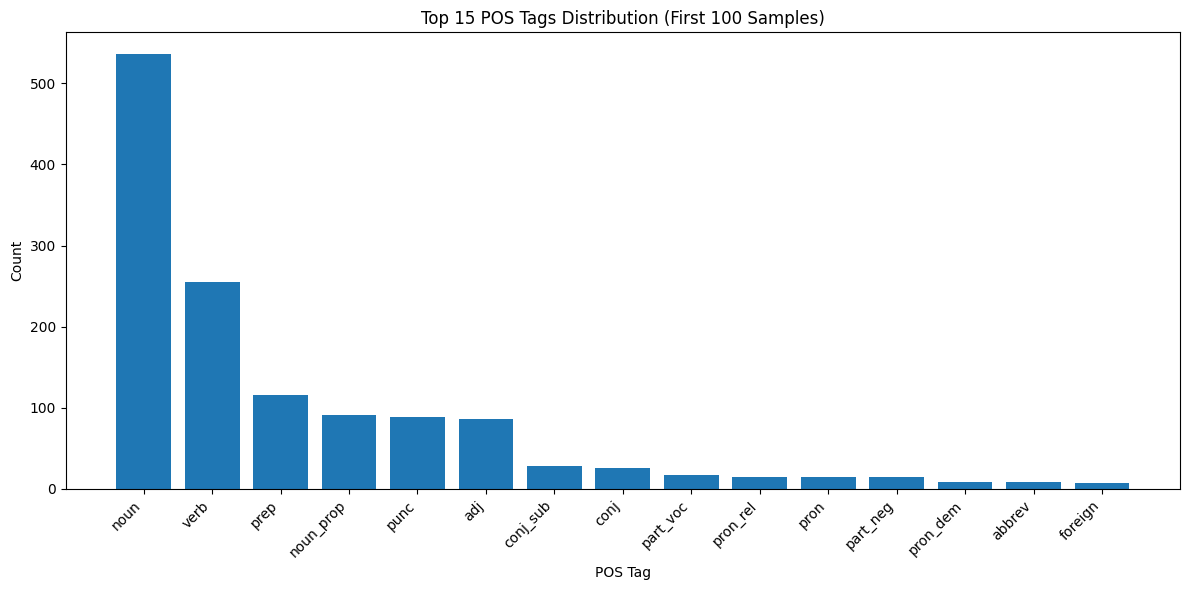

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Analyze POS tags from a sample of the dataset
sample_texts = df['text'].head(100).tolist()
all_pos_tags = []

print("Analyzing POS tags from 100 samples...")
for text in sample_texts:
    analysis = analyze_text_morphology(text, preprocessor)
    for token_analysis in analysis:
        if token_analysis['pos']:
            all_pos_tags.append(token_analysis['pos'])

# Count POS tags
pos_counter = Counter(all_pos_tags)
pos_df = pd.DataFrame(pos_counter.most_common(), columns=['POS Tag', 'Count'])

print(f"\nPOS Tag Distribution:")
print(pos_df.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(pos_df['POS Tag'][:15], pos_df['Count'][:15])
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.title('Top 15 POS Tags Distribution (First 100 Samples)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Extract Morphological Features for Entire Dataset

Now we'll apply morphological analysis to the entire dataset and extract features for machine learning.

In [9]:
def extract_comprehensive_morphological_features(text, preprocessor):
    """
    Extract comprehensive morphological features for each text.
    Returns a dictionary of numerical features suitable for ML.
    """
    analysis = analyze_text_morphology(text, preprocessor)
    
    if not analysis:
        return {
            'morph_num_tokens': 0,
            'morph_num_nouns': 0,
            'morph_num_verbs': 0,
            'morph_num_adjectives': 0,
            'morph_num_adverbs': 0,
            'morph_num_pronouns': 0,
            'morph_num_prepositions': 0,
            'morph_num_conjunctions': 0,
            'morph_num_particles': 0,
            'morph_num_proclitics': 0,
            'morph_num_enclitics': 0,
            'morph_avg_word_length': 0,
            'morph_ratio_nouns': 0,
            'morph_ratio_verbs': 0,
            'morph_ratio_adjectives': 0,
            'morph_unique_lemmas': 0,
            'morph_unique_roots': 0,
            'morph_num_masculine': 0,
            'morph_num_feminine': 0,
            'morph_num_singular': 0,
            'morph_num_dual': 0,
            'morph_num_plural': 0,
            'morph_num_perfective': 0,
            'morph_num_imperfective': 0,
            'morph_num_imperative': 0,
        }
    
    pos_tags = [a['pos'] for a in analysis if a['pos']]
    lemmas = [a['lemma'] for a in analysis if a['lemma']]
    roots = [a['root'] for a in analysis if a['root']]
    genders = [a['gender'] for a in analysis if a['gender']]
    numbers = [a['number'] for a in analysis if a['number']]
    aspects = [a['aspect'] for a in analysis if a['aspect']]
    
    num_tokens = len(analysis)
    
    features = {
        # Token counts
        'morph_num_tokens': num_tokens,
        
        # POS tag counts
        'morph_num_nouns': sum(1 for p in pos_tags if 'noun' in p.lower()),
        'morph_num_verbs': sum(1 for p in pos_tags if 'verb' in p.lower()),
        'morph_num_adjectives': sum(1 for p in pos_tags if 'adj' in p.lower()),
        'morph_num_adverbs': sum(1 for p in pos_tags if 'adv' in p.lower()),
        'morph_num_pronouns': sum(1 for p in pos_tags if 'pron' in p.lower()),
        'morph_num_prepositions': sum(1 for p in pos_tags if 'prep' in p.lower()),
        'morph_num_conjunctions': sum(1 for p in pos_tags if 'conj' in p.lower()),
        'morph_num_particles': sum(1 for p in pos_tags if 'part' in p.lower()),
        
        # Clitic counts
        'morph_num_proclitics': sum(1 for a in analysis if any([a['prc0'], a['prc1'], a['prc2'], a['prc3']])),
        'morph_num_enclitics': sum(1 for a in analysis if a['enc0']),
        
        # Word characteristics
        'morph_avg_word_length': np.mean([len(a['word']) for a in analysis]) if analysis else 0,
        
        # Ratios (normalized by token count)
        'morph_ratio_nouns': sum(1 for p in pos_tags if 'noun' in p.lower()) / num_tokens if num_tokens > 0 else 0,
        'morph_ratio_verbs': sum(1 for p in pos_tags if 'verb' in p.lower()) / num_tokens if num_tokens > 0 else 0,
        'morph_ratio_adjectives': sum(1 for p in pos_tags if 'adj' in p.lower()) / num_tokens if num_tokens > 0 else 0,
        
        # Lexical diversity
        'morph_unique_lemmas': len(set(lemmas)),
        'morph_unique_roots': len(set(roots)),
        
        # Gender counts
        'morph_num_masculine': sum(1 for g in genders if g == 'm'),
        'morph_num_feminine': sum(1 for g in genders if g == 'f'),
        
        # Number counts
        'morph_num_singular': sum(1 for n in numbers if n == 's'),
        'morph_num_dual': sum(1 for n in numbers if n == 'd'),
        'morph_num_plural': sum(1 for n in numbers if n == 'p'),
        
        # Aspect counts
        'morph_num_perfective': sum(1 for a in aspects if a == 'p'),
        'morph_num_imperfective': sum(1 for a in aspects if a == 'i'),
        'morph_num_imperative': sum(1 for a in aspects if a == 'c'),
    }
    
    return features

print("Comprehensive feature extraction function defined!")

Comprehensive feature extraction function defined!


### Apply Feature Extraction to Entire Dataset

This will process all rows and add morphological features as new columns.

In [10]:
from tqdm.auto import tqdm

# Create a copy of the original dataframe
df_with_morph = df.copy()

print(f"Processing {len(df_with_morph)} texts...")
print("This may take several minutes...\n")

# Extract features for all texts with progress bar
morphological_features_list = []
for idx, row in tqdm(df_with_morph.iterrows(), total=len(df_with_morph), desc="Extracting morphological features"):
    features = extract_comprehensive_morphological_features(row['text'], preprocessor)
    morphological_features_list.append(features)

# Convert to DataFrame
morph_features_df = pd.DataFrame(morphological_features_list)

# Concatenate with original dataframe
df_with_morph = pd.concat([df_with_morph, morph_features_df], axis=1)

print(f"\n✓ Feature extraction complete!")
print(f"Original columns: {len(df.columns)}")
print(f"New columns: {len(df_with_morph.columns)}")
print(f"Added features: {len(morph_features_df.columns)}")
print(f"\nNew feature columns:")
print(morph_features_df.columns.tolist())

Processing 3380 texts...
This may take several minutes...



Extracting morphological features: 100%|██████████| 3380/3380 [00:36<00:00, 91.47it/s] 



✓ Feature extraction complete!
Original columns: 3
New columns: 28
Added features: 25

New feature columns:
['morph_num_tokens', 'morph_num_nouns', 'morph_num_verbs', 'morph_num_adjectives', 'morph_num_adverbs', 'morph_num_pronouns', 'morph_num_prepositions', 'morph_num_conjunctions', 'morph_num_particles', 'morph_num_proclitics', 'morph_num_enclitics', 'morph_avg_word_length', 'morph_ratio_nouns', 'morph_ratio_verbs', 'morph_ratio_adjectives', 'morph_unique_lemmas', 'morph_unique_roots', 'morph_num_masculine', 'morph_num_feminine', 'morph_num_singular', 'morph_num_dual', 'morph_num_plural', 'morph_num_perfective', 'morph_num_imperfective', 'morph_num_imperative']


### Preview Enhanced Dataset

Let's look at a sample of the new dataset with morphological features.

In [11]:
# Display sample with morphological features
print("Sample of dataset with morphological features:\n")
print(df_with_morph.head())

print("\n" + "="*80)
print("Feature Statistics:")
print("="*80)
print(morph_features_df.describe())

Sample of dataset with morphological features:

                                     id  \
0  arb_a2a60c8b4af3389e842d8ec31afb0eea   
1  arb_6723e56a672674a6c1d9b28b213c4a05   
2  arb_b0365d606edeee38ae6c025b1ca33e96   
3  arb_858c0ee684049ba6f416a6cecb0b0761   
4  arb_bdafc73afd0bc2cd2badae2a089446b9   

                                                text  polarization  \
0  احلام انتي ونعالي ومنو انتي حتي تقيمين الفناني...             1   
1  وره الكواليس تنيجج من وره بعير صطناعي علي فكرة...             1   
2  .خخخخ الملكه احلام فيها شذوذ شنو هل بوس والدلع...             1   
3  الله يخزي احلام هي والبرنامج الخايس الي كله مصخره             1   
4  كس ام احلام الي ماربتها وش ملكه هههه متستاهل م...             1   

   morph_num_tokens  morph_num_nouns  morph_num_verbs  morph_num_adjectives  \
0                18               13                1                     0   
1                19                7                1                     0   
2                20               1

## 8. Save Enhanced Dataset to CSV

Save the dataset with morphological features to a new CSV file.

In [12]:
# Save to CSV
output_path = '../train/arb_clean_basic_morphological.csv'
df_with_morph.to_csv(output_path, index=False)

print(f"✓ Dataset saved successfully!")
print(f"Output file: {output_path}")
print(f"Shape: {df_with_morph.shape}")
print(f"\nFile contains:")
print(f"  - Original columns: id, text, polarization")
print(f"  - Morphological features: {len(morph_features_df.columns)} features")
print(f"  - Total columns: {len(df_with_morph.columns)}")

✓ Dataset saved successfully!
Output file: ../train/arb_clean_basic_morphological.csv
Shape: (3380, 28)

File contains:
  - Original columns: id, text, polarization
  - Morphological features: 25 features
  - Total columns: 28


### Feature Importance Visualization (Optional)

Visualize the correlation of morphological features with the polarization label.

Top 10 Positively Correlated Features:
morph_ratio_verbs         0.170361
morph_num_verbs           0.169819
morph_num_perfective      0.139438
morph_num_conjunctions    0.123413
morph_num_particles       0.110020
morph_num_imperfective    0.101482
morph_num_masculine       0.097067
morph_num_pronouns        0.092571
morph_num_imperative      0.079418
morph_num_plural          0.077423
dtype: float64

Top 10 Negatively Correlated Features:
morph_num_enclitics       0.037617
morph_num_proclitics      0.037617
morph_unique_lemmas       0.025963
morph_num_nouns           0.020534
morph_avg_word_length     0.014344
morph_num_prepositions   -0.005122
morph_num_feminine       -0.022233
morph_num_adjectives     -0.051530
morph_ratio_nouns        -0.065630
morph_ratio_adjectives   -0.112646
dtype: float64


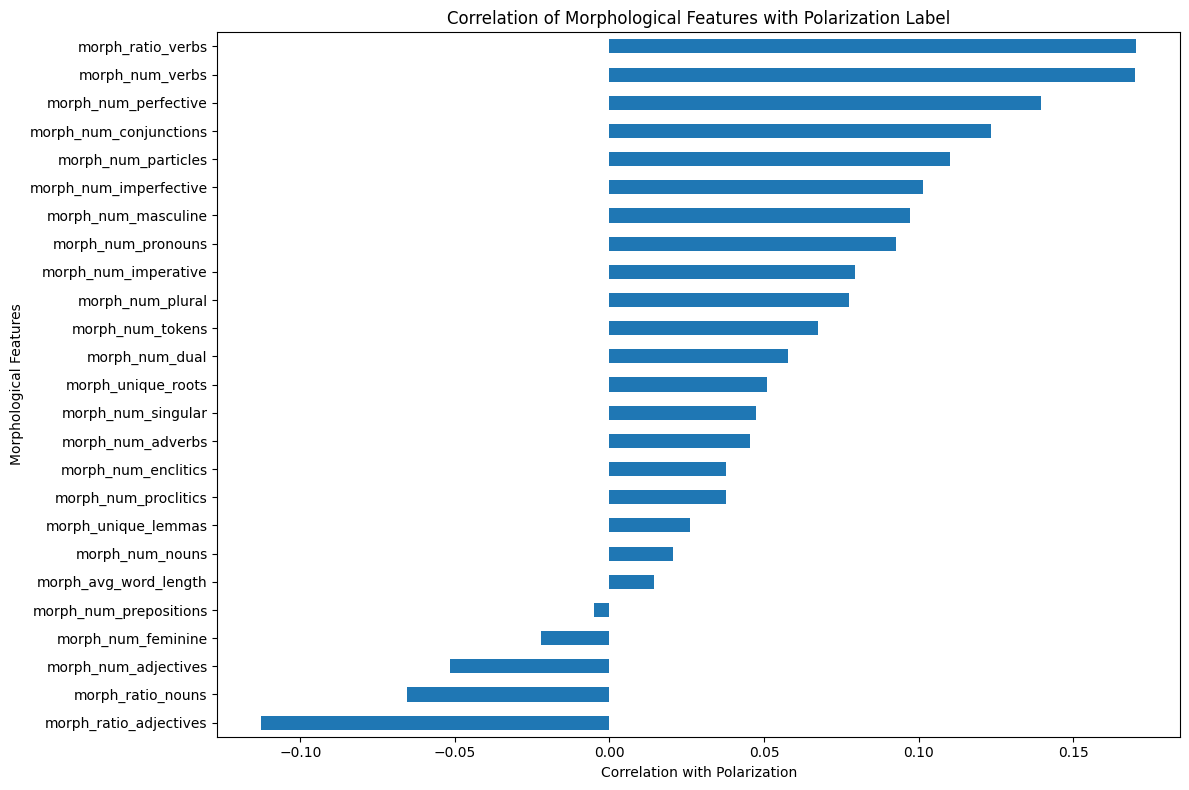

In [13]:
# Calculate correlation with polarization label
correlations = morph_features_df.corrwith(df_with_morph['polarization']).sort_values(ascending=False)

print("Top 10 Positively Correlated Features:")
print(correlations.head(10))
print("\nTop 10 Negatively Correlated Features:")
print(correlations.tail(10))

# Visualize
plt.figure(figsize=(12, 8))
correlations.sort_values().plot(kind='barh')
plt.xlabel('Correlation with Polarization')
plt.ylabel('Morphological Features')
plt.title('Correlation of Morphological Features with Polarization Label')
plt.tight_layout()
plt.show()

## 9. Sentence Structure Analysis: Toxic vs Non-Toxic Comments

Analyzing structural and morphological differences between toxic and non-toxic comments, including word order patterns, POS sequences, and linguistic features.

In [14]:
from collections import Counter, defaultdict
import seaborn as sns

# Separate toxic and non-toxic comments
toxic_df = df[df['polarization'] == 1]
non_toxic_df = df[df['polarization'] == 0]

print(f"Toxic comments: {len(toxic_df)}")
print(f"Non-toxic comments: {len(non_toxic_df)}")
print(f"Ratio: {len(toxic_df)/len(non_toxic_df):.2f}")

Toxic comments: 1512
Non-toxic comments: 1868
Ratio: 0.81


### 9.1 POS Sequence Patterns

Analyzing the most common POS tag sequences (bigrams and trigrams) in toxic vs non-toxic comments.

In [15]:
def extract_pos_sequences(texts, preprocessor, n=2):
    """
    Extract n-gram POS sequences from texts.
    n=2 for bigrams, n=3 for trigrams
    """
    sequences = []
    
    for text in texts:
        analysis = analyze_text_morphology(text, preprocessor)
        if len(analysis) >= n:
            pos_tags = [a['pos'] for a in analysis if a['pos']]
            # Create n-grams
            for i in range(len(pos_tags) - n + 1):
                sequences.append(tuple(pos_tags[i:i+n]))
    
    return sequences

# Sample 500 from each class for analysis
sample_size = 500
toxic_sample = toxic_df.sample(n=min(sample_size, len(toxic_df)), random_state=42)
non_toxic_sample = non_toxic_df.sample(n=min(sample_size, len(non_toxic_df)), random_state=42)

print(f"Analyzing POS sequences from {len(toxic_sample)} toxic and {len(non_toxic_sample)} non-toxic samples...")
print("This may take a few minutes...\n")

# Extract bigrams (2-word sequences)
print("Extracting bigrams...")
toxic_bigrams = extract_pos_sequences(toxic_sample['text'].tolist(), preprocessor, n=2)
non_toxic_bigrams = extract_pos_sequences(non_toxic_sample['text'].tolist(), preprocessor, n=2)

toxic_bigram_counts = Counter(toxic_bigrams)
non_toxic_bigram_counts = Counter(non_toxic_bigrams)

print(f"✓ Toxic bigrams: {len(toxic_bigrams)} total, {len(toxic_bigram_counts)} unique")
print(f"✓ Non-toxic bigrams: {len(non_toxic_bigrams)} total, {len(non_toxic_bigram_counts)} unique")

Analyzing POS sequences from 500 toxic and 500 non-toxic samples...
This may take a few minutes...

Extracting bigrams...
✓ Toxic bigrams: 8200 total, 250 unique
✓ Non-toxic bigrams: 7662 total, 246 unique


TOP 15 POS BIGRAMS IN TOXIC COMMENTS:
noun → noun                              : 1231 occurrences
verb → noun                              :  631 occurrences
noun → verb                              :  474 occurrences
prep → noun                              :  451 occurrences
noun → adj                               :  369 occurrences
punc → punc                              :  329 occurrences
noun → prep                              :  318 occurrences
noun → noun_prop                         :  246 occurrences
verb → prep                              :  236 occurrences
noun → punc                              :  235 occurrences
noun_prop → noun                         :  199 occurrences
adj → noun                               :  196 occurrences
verb → verb                              :  193 occurrences
punc → noun                              :  133 occurrences
adj → verb                               :  130 occurrences

TOP 15 POS BIGRAMS IN NON-TOXIC COMMENTS:
noun → noun        

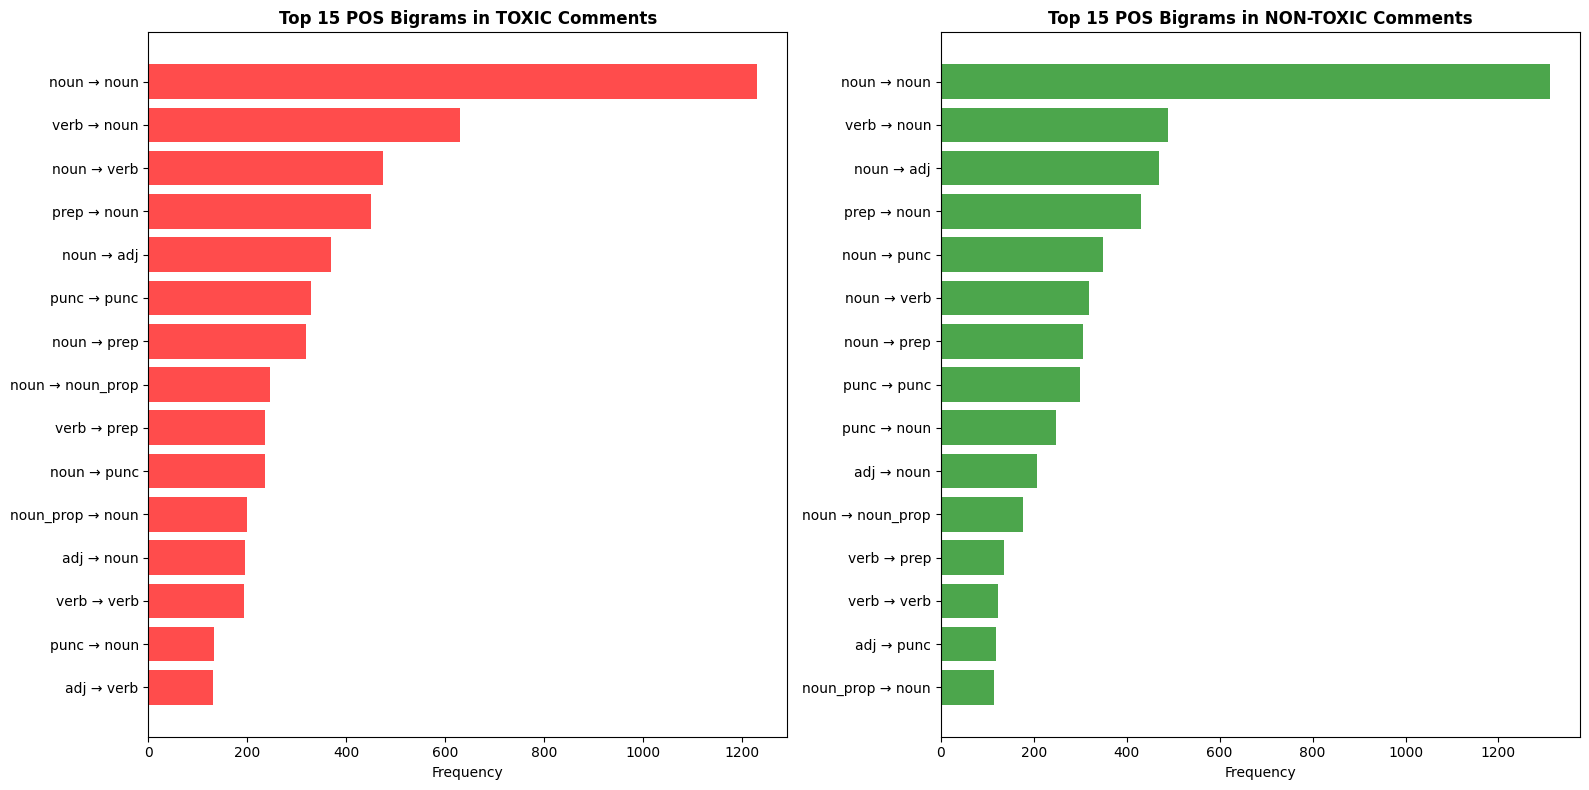

In [16]:
# Compare top bigrams
print("="*80)
print("TOP 15 POS BIGRAMS IN TOXIC COMMENTS:")
print("="*80)
for bigram, count in toxic_bigram_counts.most_common(15):
    print(f"{' → '.join(bigram):40s} : {count:4d} occurrences")

print("\n" + "="*80)
print("TOP 15 POS BIGRAMS IN NON-TOXIC COMMENTS:")
print("="*80)
for bigram, count in non_toxic_bigram_counts.most_common(15):
    print(f"{' → '.join(bigram):40s} : {count:4d} occurrences")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Toxic bigrams
top_toxic = toxic_bigram_counts.most_common(15)
toxic_labels = [' → '.join(b) for b, _ in top_toxic]
toxic_counts = [c for _, c in top_toxic]

axes[0].barh(range(len(toxic_labels)), toxic_counts, color='red', alpha=0.7)
axes[0].set_yticks(range(len(toxic_labels)))
axes[0].set_yticklabels(toxic_labels)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 15 POS Bigrams in TOXIC Comments', fontweight='bold')
axes[0].invert_yaxis()

# Non-toxic bigrams
top_non_toxic = non_toxic_bigram_counts.most_common(15)
non_toxic_labels = [' → '.join(b) for b, _ in top_non_toxic]
non_toxic_counts = [c for _, c in top_non_toxic]

axes[1].barh(range(len(non_toxic_labels)), non_toxic_counts, color='green', alpha=0.7)
axes[1].set_yticks(range(len(non_toxic_labels)))
axes[1].set_yticklabels(non_toxic_labels)
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 15 POS Bigrams in NON-TOXIC Comments', fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### 9.2 Distinctive POS Patterns

Finding POS patterns that are significantly more common in toxic vs non-toxic comments.

In [17]:
# Calculate relative frequency differences
def calculate_distinctive_patterns(toxic_counts, non_toxic_counts, min_freq=10):
    """
    Find patterns that are distinctively more common in one class vs the other.
    """
    distinctive = []
    
    all_patterns = set(toxic_counts.keys()) | set(non_toxic_counts.keys())
    
    for pattern in all_patterns:
        toxic_freq = toxic_counts.get(pattern, 0)
        non_toxic_freq = non_toxic_counts.get(pattern, 0)
        
        # Skip rare patterns
        if toxic_freq < min_freq and non_toxic_freq < min_freq:
            continue
        
        # Calculate normalized frequencies
        toxic_norm = toxic_freq / len(toxic_bigrams) if len(toxic_bigrams) > 0 else 0
        non_toxic_norm = non_toxic_freq / len(non_toxic_bigrams) if len(non_toxic_bigrams) > 0 else 0
        
        # Calculate ratio (add smoothing to avoid division by zero)
        ratio = (toxic_norm + 0.0001) / (non_toxic_norm + 0.0001)
        
        distinctive.append({
            'pattern': pattern,
            'toxic_count': toxic_freq,
            'non_toxic_count': non_toxic_freq,
            'toxic_norm': toxic_norm,
            'non_toxic_norm': non_toxic_norm,
            'ratio': ratio
        })
    
    return pd.DataFrame(distinctive)

distinctive_df = calculate_distinctive_patterns(toxic_bigram_counts, non_toxic_bigram_counts)

# Patterns more common in TOXIC comments
toxic_distinctive = distinctive_df[distinctive_df['ratio'] > 1.5].sort_values('ratio', ascending=False).head(15)
print("="*80)
print("POS PATTERNS MORE COMMON IN TOXIC COMMENTS (ratio > 1.5):")
print("="*80)
for idx, row in toxic_distinctive.iterrows():
    pattern_str = ' → '.join(row['pattern'])
    print(f"{pattern_str:40s} | Toxic: {row['toxic_count']:4d} | Non-toxic: {row['non_toxic_count']:4d} | Ratio: {row['ratio']:.2f}x")

print("\n" + "="*80)
# Patterns more common in NON-TOXIC comments
non_toxic_distinctive = distinctive_df[distinctive_df['ratio'] < 0.67].sort_values('ratio').head(15)
print("POS PATTERNS MORE COMMON IN NON-TOXIC COMMENTS (ratio < 0.67):")
print("="*80)
for idx, row in non_toxic_distinctive.iterrows():
    pattern_str = ' → '.join(row['pattern'])
    print(f"{pattern_str:40s} | Toxic: {row['toxic_count']:4d} | Non-toxic: {row['non_toxic_count']:4d} | Ratio: {row['ratio']:.2f}x")

POS PATTERNS MORE COMMON IN TOXIC COMMENTS (ratio > 1.5):
verb → pron_rel                          | Toxic:   16 | Non-toxic:    3 | Ratio: 4.17x
noun → part_voc                          | Toxic:   16 | Non-toxic:    3 | Ratio: 4.17x
adj → conj                               | Toxic:   24 | Non-toxic:    8 | Ratio: 2.65x
noun → pron_dem                          | Toxic:   25 | Non-toxic:   10 | Ratio: 2.24x
prep → verb                              | Toxic:  105 | Non-toxic:   46 | Ratio: 2.11x
part_voc → noun                          | Toxic:   28 | Non-toxic:   12 | Ratio: 2.11x
prep → prep                              | Toxic:   21 | Non-toxic:    9 | Ratio: 2.09x
punc → part_neg                          | Toxic:   12 | Non-toxic:    5 | Ratio: 2.08x
noun → conj_sub                          | Toxic:   60 | Non-toxic:   27 | Ratio: 2.05x
conj → noun_prop                         | Toxic:   14 | Non-toxic:    6 | Ratio: 2.05x
noun_quant → noun                        | Toxic:   16 | Non-t

### 9.3 Verb-Noun-Object vs Noun-Verb Patterns

Analyzing specific word order patterns that might distinguish toxic from non-toxic comments.

In [18]:
def analyze_vn_patterns(texts, preprocessor):
    """
    Analyze verb-noun patterns in texts.
    Returns counts of different patterns.
    """
    patterns = {
        'verb_noun': 0,
        'noun_verb': 0,
        'verb_noun_noun': 0,  # VNN (possible VSO)
        'noun_noun_verb': 0,  # NNV (possible OVS)
        'total_verbs': 0,
        'total_nouns': 0,
        'verb_first': 0,
        'noun_first': 0
    }
    
    for text in texts:
        analysis = analyze_text_morphology(text, preprocessor)
        if not analysis:
            continue
        
        pos_tags = [a['pos'] for a in analysis if a['pos']]
        
        # Count patterns
        for i in range(len(pos_tags) - 1):
            # Verb-Noun bigrams
            if 'verb' in pos_tags[i].lower() and 'noun' in pos_tags[i+1].lower():
                patterns['verb_noun'] += 1
            # Noun-Verb bigrams
            if 'noun' in pos_tags[i].lower() and 'verb' in pos_tags[i+1].lower():
                patterns['noun_verb'] += 1
        
        # Trigram patterns
        for i in range(len(pos_tags) - 2):
            if ('verb' in pos_tags[i].lower() and 
                'noun' in pos_tags[i+1].lower() and 
                'noun' in pos_tags[i+2].lower()):
                patterns['verb_noun_noun'] += 1
            
            if ('noun' in pos_tags[i].lower() and 
                'noun' in pos_tags[i+1].lower() and 
                'verb' in pos_tags[i+2].lower()):
                patterns['noun_noun_verb'] += 1
        
        # Count total verbs and nouns
        for pos in pos_tags:
            if 'verb' in pos.lower():
                patterns['total_verbs'] += 1
            if 'noun' in pos.lower():
                patterns['total_nouns'] += 1
        
        # Check first word
        if pos_tags:
            if 'verb' in pos_tags[0].lower():
                patterns['verb_first'] += 1
            elif 'noun' in pos_tags[0].lower():
                patterns['noun_first'] += 1
    
    return patterns

print("Analyzing verb-noun patterns in toxic comments...")
toxic_vn_patterns = analyze_vn_patterns(toxic_sample['text'].tolist(), preprocessor)

print("Analyzing verb-noun patterns in non-toxic comments...")
non_toxic_vn_patterns = analyze_vn_patterns(non_toxic_sample['text'].tolist(), preprocessor)

print("\n" + "="*80)
print("VERB-NOUN PATTERN ANALYSIS")
print("="*80)

comparison_data = []
for key in toxic_vn_patterns.keys():
    toxic_val = toxic_vn_patterns[key]
    non_toxic_val = non_toxic_vn_patterns[key]
    comparison_data.append({
        'Pattern': key,
        'Toxic': toxic_val,
        'Non-Toxic': non_toxic_val,
        'Difference': toxic_val - non_toxic_val,
        'Ratio': toxic_val / non_toxic_val if non_toxic_val > 0 else 0
    })

vn_comparison_df = pd.DataFrame(comparison_data)
print(vn_comparison_df.to_string(index=False))

Analyzing verb-noun patterns in toxic comments...
Analyzing verb-noun patterns in non-toxic comments...

VERB-NOUN PATTERN ANALYSIS
       Pattern  Toxic  Non-Toxic  Difference    Ratio
     verb_noun    718        550         168 1.305455
     noun_verb    580        416         164 1.394231
verb_noun_noun    310        238          72 1.302521
noun_noun_verb    249        167          82 1.491018
   total_verbs   1463       1048         415 1.395992
   total_nouns   4041       3848         193 1.050156
    verb_first     99         69          30 1.434783
    noun_first    247        276         -29 0.894928


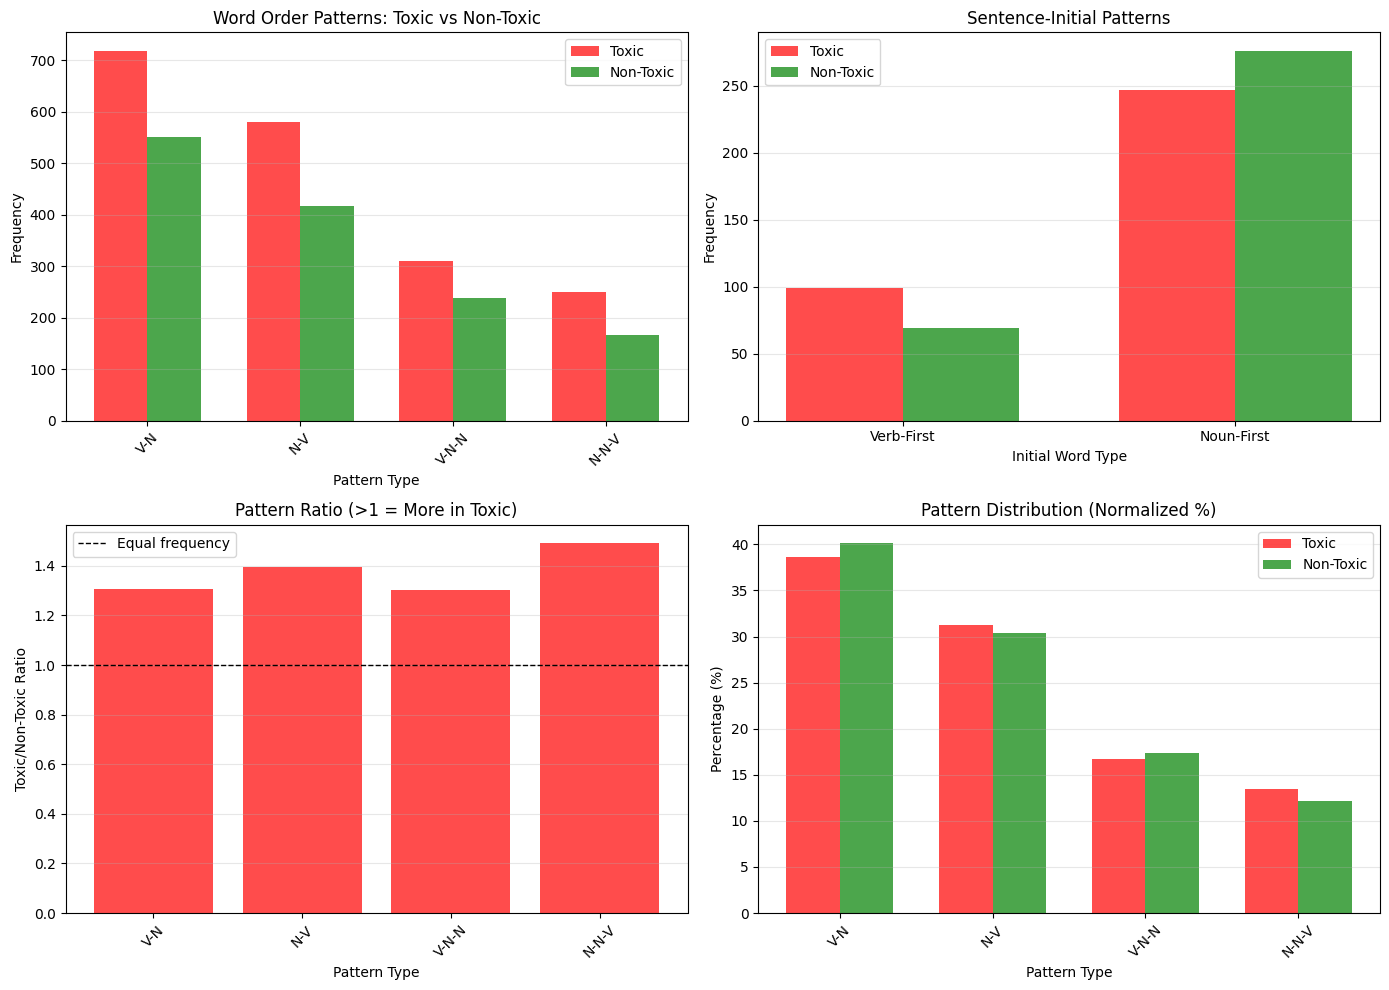

In [19]:
# Visualize verb-noun patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pattern 1: Verb-Noun vs Noun-Verb
patterns_to_plot = ['verb_noun', 'noun_verb', 'verb_noun_noun', 'noun_noun_verb']
toxic_vals = [toxic_vn_patterns[p] for p in patterns_to_plot]
non_toxic_vals = [non_toxic_vn_patterns[p] for p in patterns_to_plot]

x = np.arange(len(patterns_to_plot))
width = 0.35

axes[0, 0].bar(x - width/2, toxic_vals, width, label='Toxic', color='red', alpha=0.7)
axes[0, 0].bar(x + width/2, non_toxic_vals, width, label='Non-Toxic', color='green', alpha=0.7)
axes[0, 0].set_xlabel('Pattern Type')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Word Order Patterns: Toxic vs Non-Toxic')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['V-N', 'N-V', 'V-N-N', 'N-N-V'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Pattern 2: Sentence-initial patterns
initial_patterns = ['verb_first', 'noun_first']
toxic_initial = [toxic_vn_patterns[p] for p in initial_patterns]
non_toxic_initial = [non_toxic_vn_patterns[p] for p in initial_patterns]

x2 = np.arange(len(initial_patterns))
axes[0, 1].bar(x2 - width/2, toxic_initial, width, label='Toxic', color='red', alpha=0.7)
axes[0, 1].bar(x2 + width/2, non_toxic_initial, width, label='Non-Toxic', color='green', alpha=0.7)
axes[0, 1].set_xlabel('Initial Word Type')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Sentence-Initial Patterns')
axes[0, 1].set_xticks(x2)
axes[0, 1].set_xticklabels(['Verb-First', 'Noun-First'])
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Pattern 3: Ratios
ratios = vn_comparison_df[vn_comparison_df['Pattern'].isin(patterns_to_plot)]['Ratio'].values
axes[1, 0].bar(range(len(patterns_to_plot)), ratios, color=['red' if r > 1 else 'green' for r in ratios], alpha=0.7)
axes[1, 0].axhline(y=1, color='black', linestyle='--', linewidth=1, label='Equal frequency')
axes[1, 0].set_xlabel('Pattern Type')
axes[1, 0].set_ylabel('Toxic/Non-Toxic Ratio')
axes[1, 0].set_title('Pattern Ratio (>1 = More in Toxic)')
axes[1, 0].set_xticks(range(len(patterns_to_plot)))
axes[1, 0].set_xticklabels(['V-N', 'N-V', 'V-N-N', 'N-N-V'], rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Pattern 4: Normalized percentages
toxic_total = sum([toxic_vn_patterns[p] for p in patterns_to_plot])
non_toxic_total = sum([non_toxic_vn_patterns[p] for p in patterns_to_plot])

toxic_pct = [toxic_vn_patterns[p]/toxic_total*100 if toxic_total > 0 else 0 for p in patterns_to_plot]
non_toxic_pct = [non_toxic_vn_patterns[p]/non_toxic_total*100 if non_toxic_total > 0 else 0 for p in patterns_to_plot]

x3 = np.arange(len(patterns_to_plot))
axes[1, 1].bar(x3 - width/2, toxic_pct, width, label='Toxic', color='red', alpha=0.7)
axes[1, 1].bar(x3 + width/2, non_toxic_pct, width, label='Non-Toxic', color='green', alpha=0.7)
axes[1, 1].set_xlabel('Pattern Type')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Pattern Distribution (Normalized %)')
axes[1, 1].set_xticks(x3)
axes[1, 1].set_xticklabels(['V-N', 'N-V', 'V-N-N', 'N-N-V'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 9.4 Morphological Feature Distribution Comparison

Comparing morphological features between toxic and non-toxic comments.

In [20]:
# Compare morphological features between toxic and non-toxic
toxic_morph = df_with_morph[df_with_morph['polarization'] == 1]
non_toxic_morph = df_with_morph[df_with_morph['polarization'] == 0]

# Get morphological features
morph_cols = [col for col in df_with_morph.columns if col.startswith('morph_')]

# Calculate means
toxic_means = toxic_morph[morph_cols].mean()
non_toxic_means = non_toxic_morph[morph_cols].mean()

# Calculate difference
difference = toxic_means - non_toxic_means
ratio = toxic_means / (non_toxic_means + 0.0001)

comparison_morph = pd.DataFrame({
    'Feature': morph_cols,
    'Toxic_Mean': toxic_means.values,
    'NonToxic_Mean': non_toxic_means.values,
    'Difference': difference.values,
    'Ratio': ratio.values
}).sort_values('Difference', key=abs, ascending=False)

print("="*80)
print("MORPHOLOGICAL FEATURE COMPARISON: TOXIC vs NON-TOXIC")
print("="*80)
print("\nTop 15 Features with Largest Differences:")
print(comparison_morph.head(15).to_string(index=False))

MORPHOLOGICAL FEATURE COMPARISON: TOXIC vs NON-TOXIC

Top 15 Features with Largest Differences:
               Feature  Toxic_Mean  NonToxic_Mean  Difference    Ratio
      morph_num_tokens   19.013228      17.802463    1.210765 1.068005
   morph_num_masculine    9.952381       8.994647    0.957734 1.106466
       morph_num_verbs    2.869048       2.187366    0.681681 1.311585
   morph_num_enclitics   17.051587      16.407388    0.644200 1.039256
  morph_num_proclitics   17.051587      16.407388    0.644200 1.039256
    morph_unique_roots   13.972222      13.362420    0.609803 1.045628
    morph_num_singular   10.089947       9.599036    0.490911 1.051131
   morph_unique_lemmas   14.769841      14.423448    0.346394 1.024009
  morph_num_perfective    1.187169       0.846360    0.340810 1.402511
morph_num_imperfective    1.533069       1.255353    0.277715 1.221128
      morph_num_plural    1.910053       1.646146    0.263907 1.160248
morph_num_conjunctions    0.753968       0.493576   

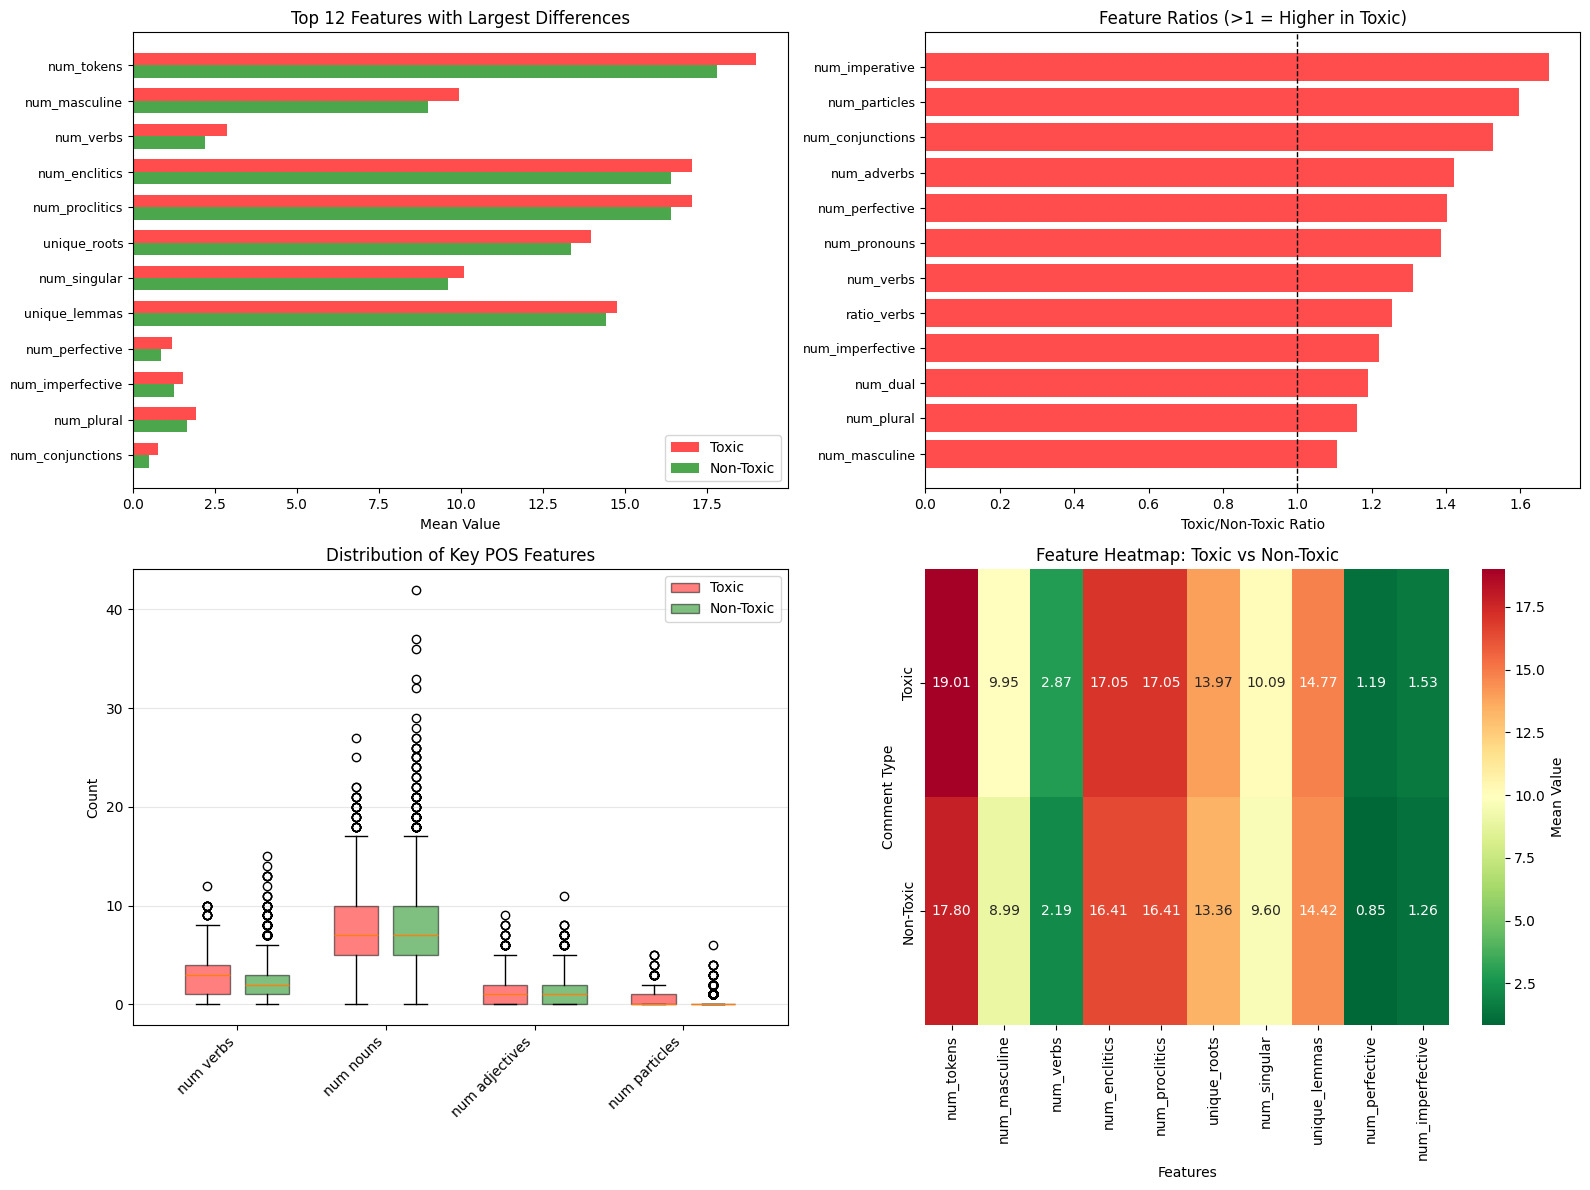

In [21]:
# Visualize feature differences
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top features by absolute difference
top_diff = comparison_morph.head(12)
x = np.arange(len(top_diff))
width = 0.35

axes[0, 0].barh(x - width/2, top_diff['Toxic_Mean'], width, label='Toxic', color='red', alpha=0.7)
axes[0, 0].barh(x + width/2, top_diff['NonToxic_Mean'], width, label='Non-Toxic', color='green', alpha=0.7)
axes[0, 0].set_yticks(x)
axes[0, 0].set_yticklabels([f.replace('morph_', '') for f in top_diff['Feature']], fontsize=9)
axes[0, 0].set_xlabel('Mean Value')
axes[0, 0].set_title('Top 12 Features with Largest Differences')
axes[0, 0].legend()
axes[0, 0].invert_yaxis()

# Plot 2: Ratio visualization
top_ratio = comparison_morph.sort_values('Ratio', ascending=False).head(12)
colors_ratio = ['red' if r > 1 else 'green' for r in top_ratio['Ratio']]

axes[0, 1].barh(range(len(top_ratio)), top_ratio['Ratio'], color=colors_ratio, alpha=0.7)
axes[0, 1].axvline(x=1, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_yticks(range(len(top_ratio)))
axes[0, 1].set_yticklabels([f.replace('morph_', '') for f in top_ratio['Feature']], fontsize=9)
axes[0, 1].set_xlabel('Toxic/Non-Toxic Ratio')
axes[0, 1].set_title('Feature Ratios (>1 = Higher in Toxic)')
axes[0, 1].invert_yaxis()

# Plot 3: Distribution comparison for key features
key_features = ['morph_num_verbs', 'morph_num_nouns', 'morph_num_adjectives', 'morph_num_particles']
data_to_plot = []
labels = []

for feat in key_features:
    if feat in morph_cols:
        labels.append(feat.replace('morph_', '').replace('_', ' '))
        data_to_plot.append([
            toxic_morph[feat].values,
            non_toxic_morph[feat].values
        ])

positions = np.arange(len(key_features))
bp_toxic = axes[1, 0].boxplot([d[0] for d in data_to_plot], positions=positions - 0.2, widths=0.3,
                                patch_artist=True, boxprops=dict(facecolor='red', alpha=0.5))
bp_non_toxic = axes[1, 0].boxplot([d[1] for d in data_to_plot], positions=positions + 0.2, widths=0.3,
                                    patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5))

axes[1, 0].set_xticks(positions)
axes[1, 0].set_xticklabels(labels, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Key POS Features')
axes[1, 0].legend([bp_toxic['boxes'][0], bp_non_toxic['boxes'][0]], ['Toxic', 'Non-Toxic'])
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Heatmap of selected features
selected_features = comparison_morph.head(10)['Feature'].tolist()
heatmap_data = pd.DataFrame({
    'Toxic': [toxic_means[f] for f in selected_features],
    'Non-Toxic': [non_toxic_means[f] for f in selected_features]
}, index=[f.replace('morph_', '') for f in selected_features])

sns.heatmap(heatmap_data.T, annot=True, fmt='.2f', cmap='RdYlGn_r', ax=axes[1, 1], cbar_kws={'label': 'Mean Value'})
axes[1, 1].set_title('Feature Heatmap: Toxic vs Non-Toxic')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Comment Type')

plt.tight_layout()
plt.show()

### 9.5 Statistical Significance Testing

Testing whether the observed differences are statistically significant.

STATISTICAL SIGNIFICANCE TEST RESULTS

Total features tested: 25
Significant differences (p < 0.05): 20

Top 15 Most Significant Differences:
               Feature  t_statistic      p_value  cohens_d effect_size
     morph_ratio_verbs    10.048347 1.986548e-23  0.346639       small
       morph_num_verbs    10.015477 2.744859e-23  0.347256       small
  morph_num_perfective     8.184159 3.842742e-16  0.282991       small
morph_num_conjunctions     7.228060 6.029591e-13  0.248307       small
morph_ratio_adjectives    -6.588962 5.118348e-11 -0.229683       small
   morph_num_particles     6.433463 1.422984e-10  0.219949       small
morph_num_imperfective     5.928793 3.358940e-09  0.204506       small
   morph_num_masculine     5.668329 1.562998e-08  0.197878       small
    morph_num_pronouns     5.403476 6.988948e-08  0.185665       small
  morph_num_imperative     4.630424 3.786692e-06  0.158059       small
      morph_num_plural     4.513402 6.597214e-06  0.155648       small
      

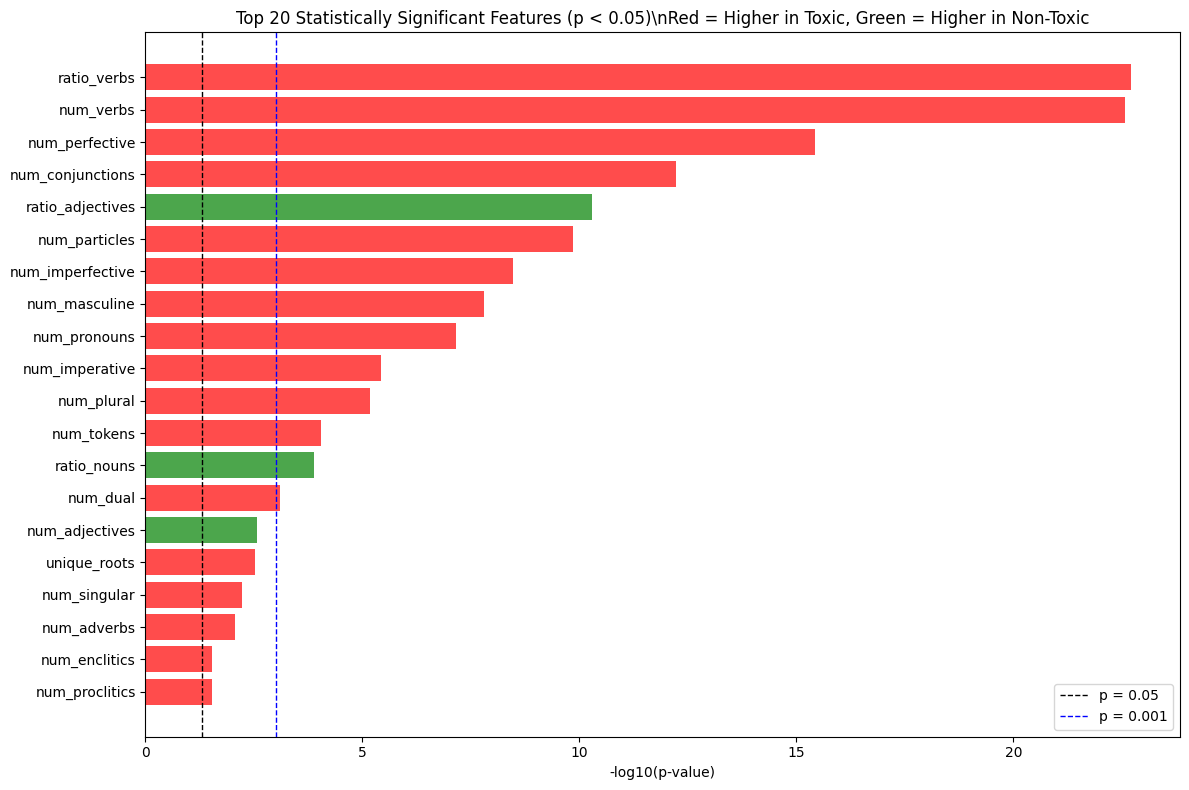

In [22]:
from scipy import stats

# Perform t-tests for each morphological feature
significance_results = []

for feat in morph_cols:
    toxic_values = toxic_morph[feat].values
    non_toxic_values = non_toxic_morph[feat].values
    
    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(toxic_values, non_toxic_values)
    
    # Calculate effect size (Cohen's d)
    mean_diff = np.mean(toxic_values) - np.mean(non_toxic_values)
    pooled_std = np.sqrt((np.var(toxic_values) + np.var(non_toxic_values)) / 2)
    cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0
    
    significance_results.append({
        'Feature': feat,
        't_statistic': t_stat,
        'p_value': p_value,
        'cohens_d': cohens_d,
        'significant': p_value < 0.05,
        'effect_size': 'large' if abs(cohens_d) > 0.8 else 'medium' if abs(cohens_d) > 0.5 else 'small'
    })

significance_df = pd.DataFrame(significance_results).sort_values('p_value')

print("="*80)
print("STATISTICAL SIGNIFICANCE TEST RESULTS")
print("="*80)
print(f"\nTotal features tested: {len(morph_cols)}")
print(f"Significant differences (p < 0.05): {significance_df['significant'].sum()}")
print(f"\nTop 15 Most Significant Differences:")
print(significance_df.head(15)[['Feature', 't_statistic', 'p_value', 'cohens_d', 'effect_size']].to_string(index=False))

# Visualize p-values
plt.figure(figsize=(12, 8))
significant_features = significance_df[significance_df['significant']].head(20)

colors = ['red' if d > 0 else 'green' for d in significant_features['cohens_d']]
plt.barh(range(len(significant_features)), -np.log10(significant_features['p_value']), color=colors, alpha=0.7)
plt.yticks(range(len(significant_features)), [f.replace('morph_', '') for f in significant_features['Feature']])
plt.xlabel('-log10(p-value)')
plt.title('Top 20 Statistically Significant Features (p < 0.05)\\nRed = Higher in Toxic, Green = Higher in Non-Toxic')
plt.axvline(x=-np.log10(0.05), color='black', linestyle='--', linewidth=1, label='p = 0.05')
plt.axvline(x=-np.log10(0.001), color='blue', linestyle='--', linewidth=1, label='p = 0.001')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 9.6 Summary of Structural and Morphological Differences

Key findings from the analysis.

In [23]:
print("="*100)
print("SUMMARY: STRUCTURAL AND MORPHOLOGICAL DIFFERENCES BETWEEN TOXIC AND NON-TOXIC COMMENTS")
print("="*100)

print("\n1. WORD ORDER PATTERNS:")
print(f"   Verb-Noun sequences: Toxic={toxic_vn_patterns['verb_noun']}, Non-Toxic={non_toxic_vn_patterns['verb_noun']}")
print(f"   Noun-Verb sequences: Toxic={toxic_vn_patterns['noun_verb']}, Non-Toxic={non_toxic_vn_patterns['noun_verb']}")
vn_ratio = toxic_vn_patterns['verb_noun'] / non_toxic_vn_patterns['verb_noun'] if non_toxic_vn_patterns['verb_noun'] > 0 else 0
nv_ratio = toxic_vn_patterns['noun_verb'] / non_toxic_vn_patterns['noun_verb'] if non_toxic_vn_patterns['noun_verb'] > 0 else 0
print(f"   V-N Ratio (Toxic/Non-Toxic): {vn_ratio:.2f}x")
print(f"   N-V Ratio (Toxic/Non-Toxic): {nv_ratio:.2f}x")

print("\n2. SENTENCE-INITIAL PATTERNS:")
verb_first_ratio = toxic_vn_patterns['verb_first'] / non_toxic_vn_patterns['verb_first'] if non_toxic_vn_patterns['verb_first'] > 0 else 0
noun_first_ratio = toxic_vn_patterns['noun_first'] / non_toxic_vn_patterns['noun_first'] if non_toxic_vn_patterns['noun_first'] > 0 else 0
print(f"   Verb-first sentences: Toxic={toxic_vn_patterns['verb_first']}, Non-Toxic={non_toxic_vn_patterns['verb_first']} (Ratio: {verb_first_ratio:.2f}x)")
print(f"   Noun-first sentences: Toxic={toxic_vn_patterns['noun_first']}, Non-Toxic={non_toxic_vn_patterns['noun_first']} (Ratio: {noun_first_ratio:.2f}x)")

print("\n3. TOP 5 MOST DISTINCTIVE MORPHOLOGICAL FEATURES:")
top_distinctive = significance_df[significance_df['significant']].head(5)
for idx, row in top_distinctive.iterrows():
    feat_name = row['Feature'].replace('morph_', '')
    direction = "higher in TOXIC" if row['cohens_d'] > 0 else "higher in NON-TOXIC"
    print(f"   {feat_name}: {direction} (Cohen's d = {row['cohens_d']:.3f}, p = {row['p_value']:.4e})")

print("\n4. MOST COMMON POS BIGRAMS IN TOXIC COMMENTS:")
for i, (bigram, count) in enumerate(toxic_bigram_counts.most_common(5), 1):
    print(f"   {i}. {' → '.join(bigram)}: {count} occurrences")

print("\n5. MOST COMMON POS BIGRAMS IN NON-TOXIC COMMENTS:")
for i, (bigram, count) in enumerate(non_toxic_bigram_counts.most_common(5), 1):
    print(f"   {i}. {' → '.join(bigram)}: {count} occurrences")

print("\n6. KEY INSIGHTS:")
# Find features with large effect sizes
large_effects = significance_df[significance_df['effect_size'] == 'large']
print(f"   - {len(large_effects)} features show LARGE effect sizes (Cohen's d > 0.8)")
print(f"   - {significance_df['significant'].sum()} out of {len(morph_cols)} features are statistically significant")

# Check if toxic comments use more verbs or nouns
if 'morph_num_verbs' in comparison_morph['Feature'].values:
    verb_diff = comparison_morph[comparison_morph['Feature'] == 'morph_num_verbs']['Difference'].values[0]
    if verb_diff > 0:
        print(f"   - Toxic comments use MORE verbs on average (+{verb_diff:.2f})")
    else:
        print(f"   - Non-toxic comments use MORE verbs on average ({verb_diff:.2f})")

if 'morph_num_nouns' in comparison_morph['Feature'].values:
    noun_diff = comparison_morph[comparison_morph['Feature'] == 'morph_num_nouns']['Difference'].values[0]
    if noun_diff > 0:
        print(f"   - Toxic comments use MORE nouns on average (+{noun_diff:.2f})")
    else:
        print(f"   - Non-toxic comments use MORE nouns on average ({noun_diff:.2f})")

print("\n" + "="*100)

SUMMARY: STRUCTURAL AND MORPHOLOGICAL DIFFERENCES BETWEEN TOXIC AND NON-TOXIC COMMENTS

1. WORD ORDER PATTERNS:
   Verb-Noun sequences: Toxic=718, Non-Toxic=550
   Noun-Verb sequences: Toxic=580, Non-Toxic=416
   V-N Ratio (Toxic/Non-Toxic): 1.31x
   N-V Ratio (Toxic/Non-Toxic): 1.39x

2. SENTENCE-INITIAL PATTERNS:
   Verb-first sentences: Toxic=99, Non-Toxic=69 (Ratio: 1.43x)
   Noun-first sentences: Toxic=247, Non-Toxic=276 (Ratio: 0.89x)

3. TOP 5 MOST DISTINCTIVE MORPHOLOGICAL FEATURES:
   ratio_verbs: higher in TOXIC (Cohen's d = 0.347, p = 1.9865e-23)
   num_verbs: higher in TOXIC (Cohen's d = 0.347, p = 2.7449e-23)
   num_perfective: higher in TOXIC (Cohen's d = 0.283, p = 3.8427e-16)
   num_conjunctions: higher in TOXIC (Cohen's d = 0.248, p = 6.0296e-13)
   ratio_adjectives: higher in NON-TOXIC (Cohen's d = -0.230, p = 5.1183e-11)

4. MOST COMMON POS BIGRAMS IN TOXIC COMMENTS:
   1. noun → noun: 1231 occurrences
   2. verb → noun: 631 occurrences
   3. noun → verb: 474 occurre